#### Problem statement: Whether the truck will reach on time or not considering various factors

In [1]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [2]:
import pandas as pd
import numpy as np
trip = pd.read_excel('TDS.xlsx')

In [3]:
trip.head(5)

,GpsProvider,BookingID,Market/Regular,BookingID_Date,vehicle_no,Origin_Location,Destination_Location,Org_lat_lon,Des_lat_lon,Data_Ping_time,...,trip_end_date,TRANSPORTATION_DISTANCE_IN_KM,vehicleType,Driver_Name,Driver_MobileNo,customerID,customerNameCode,supplierID,supplierNameCode,Material Shipped
0,CONSENT TRACK,MVCV0000927/082021,Market,2020-08-17 14:59:01.000,KA590408,"TVSLSL-PUZHAL-HUB,CHENNAI,TAMIL NADU","ASHOK LEYLAND PLANT 1- HOSUR,HOSUR,KARNATAKA","13.1550,80.1960","12.7400,77.8200",2020-08-24 00:05:09,...,NaT,320.0,NaN,NaN,NaN,ALLEXCHE45,Ashok leyland limited,VIJEXHOSR7,VIJAY TRANSPORT,BRACKET / GRAB HANDLE
1,VAMOSYS,VCV00014271/082021,Regular,2020-08-27 16:22:22.827,TN30BC5917,"DAIMLER INDIA COMMERCIAL VEHICLES,KANCHIPURAM,...","DAIMLER INDIA COMMERCIAL VEHICLES,KANCHIPURAM,...","12.8390,79.9540","12.8390,79.9540",2020-08-28 12:40:28,...,NaT,103.0,NaN,RAMESH,NaN,DMREXCHEUX,Daimler india commercial vehicles pvt lt,VJLEXSHE09,VJ LOGISTICS,ZB MODEL PLATE / 3143
2,CONSENT TRACK,VCV00014382/082021,Regular,2020-08-27 17:59:24.987,TN22AR2748,"LUCAS TVS LTD-PONDY,PONDY,PONDICHERRY","LUCAS TVS LTD-PONDY,PONDY,PONDICHERRY","11.8710,79.7390","11.8710,79.7390",2020-08-28 09:05:09,...,NaT,300.0,NaN,GIRI,NaN,LUTGCCHE06,Lucas tvs ltd,GSTEXLAK1Q,G.S. TRANSPORT,LETTERING / FUSO
3,VAMOSYS,VCV00014743/082021,Regular,2020-08-28 00:48:24.503,TN28AQ0781,"DAIMLER INDIA COMMERCIAL VEHICLES,KANCHIPURAM,...","DAIMLER INDIA COMMERCIAL VEHICLES,KANCHIPURAM,...","12.8390,79.9540","12.8390,79.9540",2020-08-28 12:40:31,...,NaT,61.0,NaN,RAVI,NaN,DMREXCHEUX,Daimler india commercial vehicles pvt lt,ARVEXNAM09,ARVINTH TRANSPORT,LU STRUT RA / RADIUS ROD
4,VAMOSYS,VCV00014744/082021,Regular,2020-08-28 01:23:19.243,TN68F1722,"LUCAS TVS LTD-PONDY,PONDY,PONDICHERRY","LUCAS TVS LTD-PONDY,PONDY,PONDICHERRY","11.8720,79.6320","11.8720,79.6320",2020-08-28 12:40:29,...,NaT,240.0,NaN,TAMIL,NaN,LUTGCCHE06,Lucas tvs ltd,SRTEXKOR96,SR TRANSPORTS,WISHBONE / V ROD/HDT


In [4]:
trip.columns

Index(['GpsProvider', 'BookingID', 'Market/Regular ', 'BookingID_Date',
       'vehicle_no', 'Origin_Location', 'Destination_Location', 'Org_lat_lon',
       'Des_lat_lon', 'Data_Ping_time', 'Planned_ETA', 'Current_Location',
       'DestinationLocation', 'actual_eta', 'Curr_lat', 'Curr_lon', 'ontime',
       'delay', 'trip_start_date', 'trip_end_date',
       'TRANSPORTATION_DISTANCE_IN_KM', 'vehicleType', 'Driver_Name',
       'Driver_MobileNo', 'customerID', 'customerNameCode', 'supplierID',
       'supplierNameCode', 'Material Shipped'],
      dtype='object')

In [5]:
trip.shape #finding the number of rows and columns

(6880, 29)

In [6]:
trip.info()       # to get an overall view about data set

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6880 entries, 0 to 6879
Data columns (total 29 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   GpsProvider                    5927 non-null   object        
 1   BookingID                      6880 non-null   object        
 2   Market/Regular                 6880 non-null   object        
 3   BookingID_Date                 6880 non-null   datetime64[ns]
 4   vehicle_no                     6880 non-null   object        
 5   Origin_Location                6880 non-null   object        
 6   Destination_Location           6880 non-null   object        
 7   Org_lat_lon                    6880 non-null   object        
 8   Des_lat_lon                    6880 non-null   object        
 9   Data_Ping_time                 5927 non-null   datetime64[ns]
 10  Planned_ETA                    6880 non-null   datetime64[ns]
 11  Current_Location 

The dataset have 6880 rows and 29 columns.Null vvalues are present in various columns

### 2) Preprocessing the dataset

#### 2.1)  Missing value handling

In [7]:
# Checking for missing values
trip.isna().sum()

GpsProvider                       953
BookingID                           0
Market/Regular                      0
BookingID_Date                      0
vehicle_no                          0
Origin_Location                     0
Destination_Location                0
Org_lat_lon                         0
Des_lat_lon                         0
Data_Ping_time                    953
Planned_ETA                         0
Current_Location                  964
DestinationLocation                 0
actual_eta                         37
Curr_lat                          953
Curr_lon                          953
ontime                           4332
delay                            2538
trip_start_date                     0
trip_end_date                     194
TRANSPORTATION_DISTANCE_IN_KM     712
vehicleType                       828
Driver_Name                      3429
Driver_MobileNo                  4189
customerID                          0
customerNameCode                    0
supplierID  

In [8]:
# Fliiling 'Driver_MobileNo' by matching Driver_name and the rest with 0
# Driver_MobileNo is of float type (in the data set)

In [9]:
trip['Driver_MobileNo'] = trip['Driver_MobileNo'].fillna(trip.groupby('Driver_Name')['Driver_MobileNo'].transform('median'))

In [10]:
trip['Driver_MobileNo'].fillna(0, inplace=True)

In [11]:
# Filling null values in Driver_name column with 'Unknown' tag
trip['Driver_Name']=trip['Driver_Name'].fillna('Unknown')

In [12]:
# Filling Gps provider after grouping by 'vehicle_no' and rest by 'Unknown'

In [14]:
trip['GpsProvider'] =trip.groupby('vehicle_no').GpsProvider.apply(lambda x: x.fillna(x.mode(dropna=False).head()[0])).reset_index(drop=True)

In [15]:
trip['GpsProvider']=trip['GpsProvider'].fillna('Unknown')

In [16]:
# Filling 'vehicleType' provider after grouping by 'vehicle_no' and rest by 'Unknown'

In [18]:
trip['vehicleType'] =trip.groupby('vehicle_no').vehicleType.apply(lambda x: x.fillna(x.mode(dropna=False).head()[0])).reset_index(drop=True)

In [19]:
trip['vehicleType']=trip['vehicleType'].fillna('Unknown')

In [20]:
# Filling 'TRANSPORTATION_DISTANCE_IN_KM'

In [21]:
from geopy import distance
geodistance_km = []
for row in trip.itertuples(index=False):
   geodistance_km.append(distance.distance(row.Org_lat_lon, row.Des_lat_lon).km)
trip['geodistaince_km']=geodistance_km
# Replace NaN row in 'TRANSPORTATION_DISTANCE_IN_KM' with geodisatnce values
trip.TRANSPORTATION_DISTANCE_IN_KM.fillna(trip.geodistaince_km, inplace=True)

In [22]:
trip=trip.drop('geodistaince_km',axis=1)

In [23]:
# Filling and encoding ontime and delay columns 

In [24]:
trip.ontime.replace({'G':1, np.NaN:0},inplace=True)
trip.delay.replace({'R':1, np.NaN:0},inplace=True)

In [25]:
# Dropping fields where Location related data are missing

In [26]:
trip.dropna(subset=['Current_Location'], inplace=True)

In [27]:
# Filling 'trip_end_date'

In [28]:
import pandas as pd
pd.options.mode.chained_assignment = None  # default='warn'

In [29]:
import datetime
import random
df_sub=trip[trip['trip_end_date'].isna()]
for i in df_sub.index:
  if df_sub['ontime'][i]==0:
    df_sub['trip_end_date'][i]=df_sub['actual_eta'][i]
  else:
    df_sub['trip_end_date'][i]=df_sub['Planned_ETA'][i]-datetime.timedelta(random.randint(0,3))

In [30]:
mask = trip.BookingID.isin(df_sub.BookingID)
trip.loc[mask,'trip_end_date'] =df_sub ['trip_end_date']

In [31]:
# (Eventhough part of Feature engineering,adding new columns Origin city and Dest city for usage in the upcoming steps)

In [32]:
trip['Origin_city'] = trip['Origin_Location'].str.split(',').apply(lambda x: x[1])
trip['Dest_city'] = trip['Destination_Location'].str.split(',').apply(lambda x: x[1])

In [33]:
#Null values in actualETA falls between continuous dates and times,so filling them using ffill
trip['actual_eta']=trip['actual_eta'].fillna(method='ffill')

In [34]:
trip.isna().sum()

GpsProvider                      0
BookingID                        0
Market/Regular                   0
BookingID_Date                   0
vehicle_no                       0
Origin_Location                  0
Destination_Location             0
Org_lat_lon                      0
Des_lat_lon                      0
Data_Ping_time                   0
Planned_ETA                      0
Current_Location                 0
DestinationLocation              0
actual_eta                       0
Curr_lat                         0
Curr_lon                         0
ontime                           0
delay                            0
trip_start_date                  0
trip_end_date                    0
TRANSPORTATION_DISTANCE_IN_KM    0
vehicleType                      0
Driver_Name                      0
Driver_MobileNo                  0
customerID                       0
customerNameCode                 0
supplierID                       0
supplierNameCode                 0
Material Shipped    

#### 2.2)  Outlier detection and handling

In [35]:
for i in trip.columns:
    print(i,'___',trip[i].nunique(),'___',trip[i].dtype)

GpsProvider ___ 29 ___ object
BookingID ___ 5911 ___ object
Market/Regular  ___ 2 ___ object
BookingID_Date ___ 5225 ___ datetime64[ns]
vehicle_no ___ 1769 ___ object
Origin_Location ___ 169 ___ object
Destination_Location ___ 460 ___ object
Org_lat_lon ___ 169 ___ object
Des_lat_lon ___ 462 ___ object
Data_Ping_time ___ 3745 ___ datetime64[ns]
Planned_ETA ___ 5375 ___ datetime64[ns]
Current_Location ___ 2567 ___ object
DestinationLocation ___ 460 ___ object
actual_eta ___ 5820 ___ datetime64[ns]
Curr_lat ___ 4130 ___ float64
Curr_lon ___ 4100 ___ float64
ontime ___ 2 ___ int64
delay ___ 2 ___ int64
trip_start_date ___ 5219 ___ datetime64[ns]
trip_end_date ___ 3995 ___ datetime64[ns]
TRANSPORTATION_DISTANCE_IN_KM ___ 609 ___ float64
vehicleType ___ 42 ___ object
Driver_Name ___ 1356 ___ object
Driver_MobileNo ___ 1274 ___ float64
customerID ___ 38 ___ object
customerNameCode ___ 38 ___ object
supplierID ___ 274 ___ object
supplierNameCode ___ 262 ___ object
Material Shipped ___ 1202 __

In [36]:
#Using box plot to determine outliers for continuous numerical variable

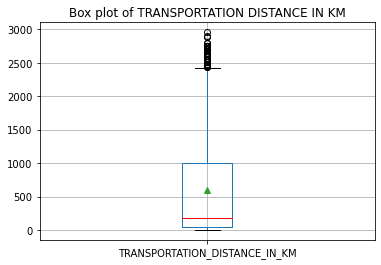

In [37]:
import matplotlib.pyplot as plt
plt.title('Box plot of TRANSPORTATION DISTANCE IN KM')
medianprops = dict(color="red",linewidth=1)
trip.boxplot(column='TRANSPORTATION_DISTANCE_IN_KM',return_type='axes',showmeans=True,medianprops=medianprops)
plt.show()

In [38]:
# Finding the outlier using percentiles
import numpy as np
Q1=np.percentile(trip['TRANSPORTATION_DISTANCE_IN_KM'],25,interpolation='midpoint')
Q2=np.percentile(trip['TRANSPORTATION_DISTANCE_IN_KM'],50,interpolation='midpoint')
Q3=np.percentile(trip['TRANSPORTATION_DISTANCE_IN_KM'],75,interpolation='midpoint')
IQR=Q3-Q1
low_limit=Q1-1.5*IQR
Up_limit=Q3+1.5*IQR
outlier=[]
for x in trip['TRANSPORTATION_DISTANCE_IN_KM']:
    if((x>Up_limit) or (x<low_limit)):
       outlier.append(x)
print('Number of outliers',len(outlier))

Number of outliers 167


In [39]:
outlier

[2543.0,
 2750.0,
 2750.0,
 2455.0,
 2750.0,
 2750.0,
 2750.0,
 2600.0,
 2750.0,
 2600.0,
 2600.0,
 2750.0,
 2455.0,
 2700.0,
 2750.0,
 2750.0,
 2455.0,
 2600.0,
 2700.0,
 2750.0,
 2750.0,
 2750.0,
 2700.0,
 2455.0,
 2600.0,
 2455.0,
 2543.0,
 2455.0,
 2455.0,
 2455.0,
 2553.0,
 2483.0,
 2511.0,
 2553.0,
 2884.0,
 2455.0,
 2700.0,
 2750.0,
 2600.0,
 2898.0,
 2600.0,
 2750.0,
 2750.0,
 2700.0,
 2704.0,
 2700.0,
 2455.0,
 2600.0,
 2455.0,
 2700.0,
 2700.0,
 2750.0,
 2455.0,
 2648.0,
 2700.0,
 2700.0,
 2511.0,
 2441.0,
 2455.0,
 2600.0,
 2438.0,
 2750.0,
 2700.0,
 2700.0,
 2750.0,
 2455.0,
 2455.0,
 2455.0,
 2750.0,
 2455.0,
 2600.0,
 2750.0,
 2700.0,
 2463.0,
 2750.0,
 2600.0,
 2600.0,
 2700.0,
 2463.0,
 2608.0,
 2750.0,
 2455.0,
 2455.0,
 2600.0,
 2455.0,
 2455.0,
 2511.0,
 2455.0,
 2455.0,
 2455.0,
 2700.0,
 2700.0,
 2710.0,
 2600.0,
 2700.0,
 2681.0,
 2750.0,
 2750.0,
 2455.0,
 2455.0,
 2455.0,
 2543.0,
 2600.0,
 2543.0,
 2600.0,
 2700.0,
 2700.0,
 2511.0,
 2700.0,
 2543.0,
 2455.0,
 

All outliers are between 2500 and 3000 

We could easily cap the outliers. But the 169 outliers which are distances between 2500 and 3000, is a natural part of the population , so leaving it in the dataset

In [40]:
trip[trip['TRANSPORTATION_DISTANCE_IN_KM']==0].head(5)

,GpsProvider,BookingID,Market/Regular,BookingID_Date,vehicle_no,Origin_Location,Destination_Location,Org_lat_lon,Des_lat_lon,Data_Ping_time,...,vehicleType,Driver_Name,Driver_MobileNo,customerID,customerNameCode,supplierID,supplierNameCode,Material Shipped,Origin_city,Dest_city
1278,VAMOSYS,AEIBK2024564,Regular,2020-08-01 11:21:44,MH14GU4937,"Shive, Pune, Maharashtra","Shive, Pune, Maharashtra","18.750621,73.87719","18.750621,73.87719",2020-08-14 14:50:27,...,1.5 MT Vehicle (Closed Body),VIKAS DABHADE,8.421821e+09,CSYEXCHEM2,Comstar automotive technologies pvt ltd,67824,KIRAN BAJIRAO SHINDE,PINION,Pune,Pune
1400,VAMOSYS,AEIBK2025418,Regular,2020-08-10 11:54:17,MH14GU4937,"Shive, Pune, Maharashtra","Shive, Pune, Maharashtra","18.750621,73.87719","18.750621,73.87719",2020-08-13 13:45:34,...,1.5 MT Vehicle (Closed Body),KIRAN SHINDE,9.096448e+09,CSYEXCHEM2,Comstar automotive technologies pvt ltd,67824,KIRAN BAJIRAO SHINDE,AUTO PARTS,Pune,Pune
1401,VAMOSYS,AEIBK2024916,Regular,2020-08-05 17:53:18,MH14GU4937,"Shive, Pune, Maharashtra","Shive, Pune, Maharashtra","18.750621,73.87719","18.750621,73.87719",2020-08-13 13:25:22,...,1.5 MT Vehicle (Closed Body),VIKAS DABHADE,8.421821e+09,CSYEXCHEM2,Comstar automotive technologies pvt ltd,67824,KIRAN BAJIRAO SHINDE,AUTO PARTS,Pune,Pune
1402,VAMOSYS,AEIBK2025420,Regular,2020-08-10 12:12:14,MH14EM0172,"Shive, Pune, Maharashtra","Shive, Pune, Maharashtra","18.750621,73.87719","18.750621,73.87719",2020-08-13 13:25:21,...,Mahindra LCV 1MT,VIKAS DABHADE,8.421821e+09,CSYEXCHEM2,Comstar automotive technologies pvt ltd,67824,KIRAN BAJIRAO SHINDE,EMPTY TRAYS,Pune,Pune
1408,VAMOSYS,AEIBK2025410,Regular,2020-08-10 11:25:30,MH12FZ3608,"Shive, Pune, Maharashtra","Shive, Pune, Maharashtra","18.750621,73.87719","18.750621,73.87719",2020-08-13 12:45:30,...,17 FT Open 5MT - MCV,DAIWAN KADAM,9.272500e+09,CSYEXCHEM2,Comstar automotive technologies pvt ltd,67762,DAIWAN DEVIDAS KADAM,EMPTY TRAY,Pune,Pune


In [41]:
pd.set_option('display.max_columns', None)
trip.sort_values('trip_end_date').head(5)

,GpsProvider,BookingID,Market/Regular,BookingID_Date,vehicle_no,Origin_Location,Destination_Location,Org_lat_lon,Des_lat_lon,Data_Ping_time,Planned_ETA,Current_Location,DestinationLocation,actual_eta,Curr_lat,Curr_lon,ontime,delay,trip_start_date,trip_end_date,TRANSPORTATION_DISTANCE_IN_KM,vehicleType,Driver_Name,Driver_MobileNo,customerID,customerNameCode,supplierID,supplierNameCode,Material Shipped,Origin_city,Dest_city
6868,JTECH,WDSBKTP44502,Regular,2019-04-15 15:15:13,KA21A5090,"Mugabala, Bangalore Rural, Karnataka","Peenya Small Industries, Bangalore, Karnataka","16.560192249175344,80.792293091599547","13.196312912801169,77.708156925688726",2019-06-14 15:20:12,1899-12-30 04:06:00,"Shed No 60, Medahalli Kadugodi Road, Virgonaga...","Peenya Small Industries, Bangalore, Karnataka",1899-12-30 03:21:00,13.025077,77.723114,0,1,1899-12-30 00:00:00,1899-12-30 03:21:00,41.000000,40 FT 3XL Trailer 35MT,Unknown,0.0,LTLEXMUM40,Larsen & toubro limited,55556,A S TRANSPORTS,INSRT-VLV ST INTK,Bangalore Rural,Bangalore
5887,JTECH,WDSBKTP42161,Regular,2019-03-21 12:21:39,KA01AH5384,"Mugabala, Bangalore Rural, Karnataka","Bangalore International Airport, Bangalore, Ka...","12.992699792116747,77.803841411108593","13.196312912801169,77.708156925688726",2019-06-15 11:40:12,2019-03-23 10:01:24,"Kempegowda Int'l Airport Rd, Bengaluru Interna...","Bangalore International Airport, Bangalore, Ka...",2019-03-23 09:16:24,12.359047,76.636158,1,0,2019-03-23 09:02:24,2019-03-23 09:16:24,24.800983,40 FT 3XL Trailer 35MT,Unknown,0.0,LTLEXMUM40,Larsen & toubro limited,999,Unknown,SPRING BEARING / SPRING SEAT RH,Bangalore Rural,Bangalore
5895,JTECH,WDSBKTP42156,Regular,2019-03-21 10:55:28,KA01AH4855,"Mugabala, Bangalore Rural, Karnataka","Bangalore International Airport, Bangalore, Ka...","12.992699792116747,77.803841411108593","13.196312912801169,77.708156925688726",2019-06-15 11:40:12,2019-03-23 10:35:31,"Shed No 60, Medahalli Kadugodi Road, Virgonaga...","Bangalore International Airport, Bangalore, Ka...",2019-03-23 09:50:31,13.024894,77.722614,1,0,2019-03-23 09:36:31,2019-03-23 09:50:31,24.800983,40 FT 3XL Trailer 35MT,Unknown,0.0,LTLEXMUM40,Larsen & toubro limited,55556,A S TRANSPORTS,HOSE / CONDENSATION DRAIN,Bangalore Rural,Bangalore
5891,JTECH,WDSBKTP42153,Regular,2019-03-21 10:55:28,KA21A5090,"Mugabala, Bangalore Rural, Karnataka","Bangalore International Airport, Bangalore, Ka...","12.992699792116747,77.803841411108593","13.196312912801169,77.708156925688726",2019-06-15 11:40:12,2019-03-23 10:47:00,"Shed No 60, Medahalli Kadugodi Road, Virgonaga...","Bangalore International Airport, Bangalore, Ka...",2019-03-23 10:02:00,13.025081,77.723115,1,0,2019-03-23 09:48:00,2019-03-23 10:02:00,24.800983,40 FT 3XL Trailer 35MT,Unknown,0.0,LTLEXMUM40,Larsen & toubro limited,55556,A S TRANSPORTS,SEALING LIP / HDT,Bangalore Rural,Bangalore
5888,JTECH,WDSBKTP42441,Regular,2019-03-23 16:04:17,KA01AH5384,"Mugabala, Bangalore Rural, Karnataka","Kengeri, Bangalore Rural, Karnataka","12.992699792116747,77.803841411108593","12.73017358940589,77.95620203691567",2019-06-15 11:40:12,2019-03-25 10:48:00,"Kempegowda Int'l Airport Rd, Bengaluru Interna...","Kengeri, Bangalore Rural, Karnataka",2019-03-25 10:03:00,12.359047,76.636158,1,0,2019-03-25 09:06:00,2019-03-25 10:03:00,33.421607,40 FT 3XL Trailer 35MT,Unknown,0.0,LTLEXMUM40,Larsen & toubro limited,999,Unknown,SPRING BEARING / SPRING SEAT LH,Bangalore Rural,Bangalore Rural


In [42]:
#6868 index row have years as 1899 in all datetime features, may be it's a mistake
#So removing that single outlier

In [43]:
trip= trip.drop(labels=6868, axis=0)

All other values are categorical variables(except mobile number which doesnt require outlier detection)

#### 2.3)  Encoding

Already carried out encoding for on time and delay time(during missing value stage).Carrying out encoding for all other variables which are required for model building.

In [70]:
from sklearn import preprocessing
label_encoder = preprocessing.LabelEncoder()
trip['Market/Regular ']= label_encoder.fit_transform(trip['Market/Regular '])
trip['Market/Regular '].unique()

array([0, 1])

In [71]:
trip['vehicle_no']=trip.vehicle_no.astype("category").cat.codes
trip['Current_Location']=trip.Current_Location.astype("category").cat.codes
trip['vehicleType']=trip.vehicleType.astype("category").cat.codes
trip['Material Shipped']=trip['Material Shipped'].astype("category").cat.codes
trip['Driver_Name']=trip['Driver_Name'].astype("category").cat.codes
trip['Origin_city']=trip['Origin_city'].astype("category").cat.codes
trip['Dest_city']=trip['Dest_city'].astype("category").cat.codes
trip['Driver_MobileNo']=trip.vehicle_no.astype("category").cat.codes
#trip['ENTD']=trip.ENTD.astype("category").cat.codes
trip['supplierNameCode']=trip.supplierNameCode.astype("category").cat.codes
trip['customerNameCode']=trip.supplierNameCode.astype("category").cat.codes

#### 2.4) Feature reduction

The following feature's are not relevent to the classification model we are building.
GpsProvider,BookingID,BookingID_Date,Data_Ping_time.So dropping these features .


In [72]:
trip=trip.drop(['GpsProvider','BookingID','BookingID_Date','Data_Ping_time'], axis = 1)

Either supplierID or supplierNameCode needs to be maintained,so choosing supplierNameCode(Since EDA needs to be done)
Either customerID or customerNameCode needs to be maintained,so choosing customerID(Since EDA needs to be done)

In [73]:
trip=trip.drop(['supplierID','customerID'], axis = 1)

Dropping those columns which whose features are already incorporated into the model by other features.

In [74]:
trip=trip.drop(['Org_lat_lon','Des_lat_lon','actual_eta','Curr_lon','Curr_lat'], axis = 1)

Origin city and destination city serves the purpose than orgin and destination location

In [75]:
trip=trip.drop(['Origin_Location','Destination_Location','DestinationLocation','Driver_MobileNo','Planned_ETA'],axis=1)

Dropping "delay"column ,since ontime column also represents the information.

In [77]:
trip=trip.drop(['delay'], axis = 1)

#### 2.5) Standardization/normalization

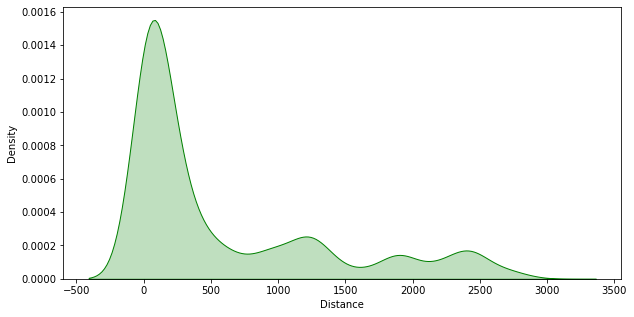

In [78]:
import seaborn as sns
fig =sns.kdeplot(trip['TRANSPORTATION_DISTANCE_IN_KM'],shade=True, color="g")
fig.set_xlabel("Distance",fontsize=10)
plt.show()

In [79]:
# Doing standardization on the real numerical column 'TRANSPORTATION_DISTANCE_IN_KM',others are encoded/true categorical columns
from sklearn import preprocessing
standardisation=preprocessing.StandardScaler()
trip[['TRANSPORTATION_DISTANCE_IN_KM']]=standardisation.fit_transform(trip[['TRANSPORTATION_DISTANCE_IN_KM']])

In [80]:
trip['TRANSPORTATION_DISTANCE_IN_KM'].describe()

count    5.915000e+03
mean    -2.538066e-15
std      1.000085e+00
min     -7.673568e-01
25%     -7.118024e-01
50%     -5.386792e-01
75%      5.246069e-01
max      3.050008e+00
Name: TRANSPORTATION_DISTANCE_IN_KM, dtype: float64

#### 2.6) Feature Engineering

Calculating the expected no: of travel days.

In [81]:
trip['trip_start_date'] = trip['trip_start_date'].dt.date

In [82]:
trip['trip_end_date'] = trip['trip_end_date'].dt.date

In [83]:
trip['ENTD']=trip['trip_end_date']-trip['trip_start_date']
trip['ENTD']=trip.ENTD.astype("category").cat.codes

In [84]:
# Dropping trip start date and trip end date.

In [85]:
trip=trip.drop(['trip_start_date','trip_end_date'], axis = 1)

In [87]:
for i in trip.columns:
    print(i,'___',trip[i].nunique(),'___',trip[i].dtype)

Market/Regular  ___ 2 ___ int32
vehicle_no ___ 1769 ___ int16
Current_Location ___ 2567 ___ int16
ontime ___ 2 ___ int64
TRANSPORTATION_DISTANCE_IN_KM ___ 609 ___ float64
vehicleType ___ 42 ___ int8
Driver_Name ___ 1356 ___ int16
customerNameCode ___ 262 ___ int16
supplierNameCode ___ 262 ___ int16
Material Shipped ___ 1201 ___ int16
Origin_city ___ 78 ___ int8
Dest_city ___ 208 ___ int16
ENTD ___ 80 ___ int8


Total 13 columns with all int/ float type data(encoded as well as original)

### 3) EDA

#### 3.1) Univariate Analysis

Percentage of ontime and delay deliveries

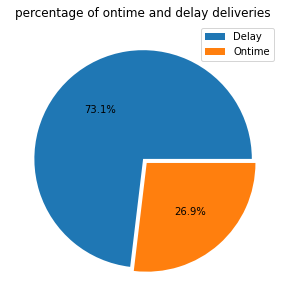

In [44]:
plt.rcParams['figure.figsize']=(5,5)
plt.pie(trip['ontime'].value_counts(), explode = (0, 0.05), autopct='%1.1f%%')
plt.title('Percentage of ontime and delay deliveries')
plt.legend(['Delay', 'Ontime'])
plt.show()

From the chart,it can be understood that Delayed deliveries(73.1%)are more than Ontime deliveries(26.9%)

Driver Preference

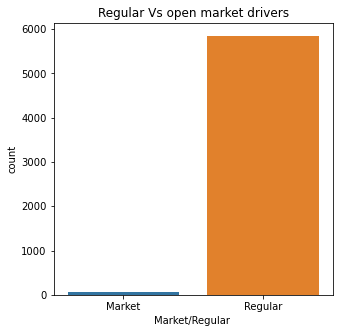

In [50]:
import seaborn as sns
# count plot on single categorical variable
sns.countplot(x ='Market/Regular ',data =trip)
plt.rcParams['figure.figsize']=(4,4)
plt.title('Regular Vs open market drivers')
# Show the plot
plt.show()

Regular drivers are preferred more than those available in the open labour market.

Material shipment

Text(0.5, 1.0, 'Most of the Material Shipment')

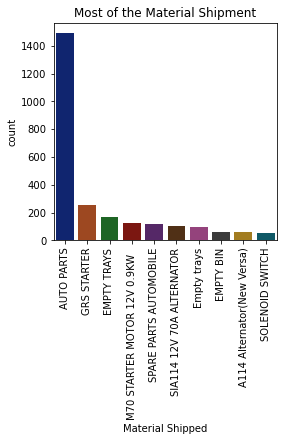

In [51]:
sns.countplot(trip['Material Shipped'],
             order=trip['Material Shipped'].value_counts().head(10).index,
             palette='dark')
plt.xticks(rotation=90)
plt.title('Most of the Material Shipment')

Auto parts constitue the most number of material shipped.

Vehicle Type

Text(0.5, 1.0, 'Most of the Vehicle type')

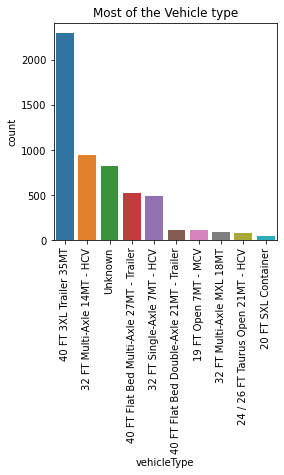

In [53]:
sns.countplot(trip['vehicleType'],
             order=trip['vehicleType'].value_counts().head(10).index,
             )
plt.xticks(rotation=90)
plt.title('Most of the Vehicle type')

It can be seen that 40FT 3XL Trailer-35 MT is the mostly used truck type.

Origin cities

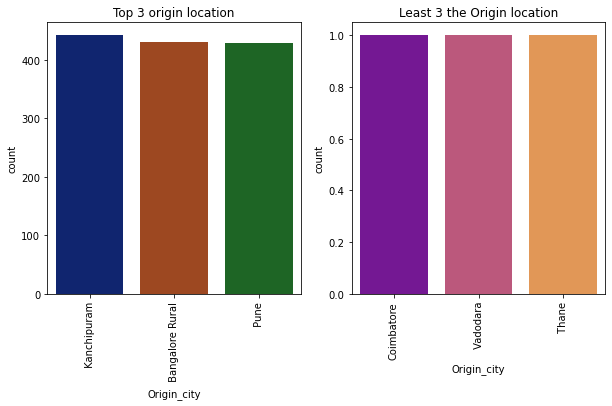

In [60]:
plt.rcParams['figure.figsize']=10,5

plt.subplot(121)
sns.countplot(trip['Origin_city'],
             order=trip['Origin_city'].value_counts().head(3).index,
             palette='dark')
plt.xticks(rotation=90)
plt.title('Top 3 origin location')

plt.subplot(122)
sns.countplot(trip['Origin_city'],
             order=trip['Origin_city'].value_counts().tail(3).index,
             palette='plasma')
plt.xticks(rotation=90)
plt.title('Least 3 the Origin location')
plt.show()

#### 3.2) Bivariate Analysis

Transportation distance with on time delivery

<AxesSubplot:xlabel='ontime', ylabel='TRANSPORTATION_DISTANCE_IN_KM'>

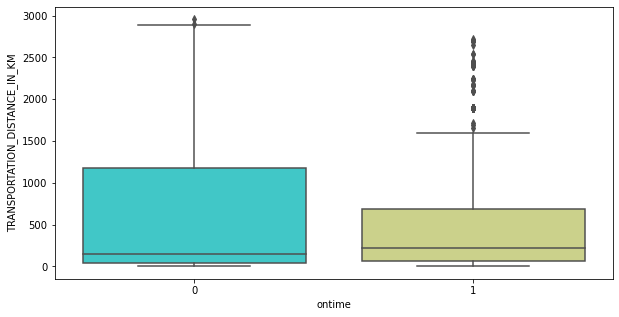

In [61]:
sns.boxplot(x='ontime',y='TRANSPORTATION_DISTANCE_IN_KM',data=trip,palette='rainbow')

As expected higher median for ontime deliveries are within short distances.

Supliers with more no. of ontime delivery

In [63]:
trip[trip['ontime']==1][['supplierNameCode', 'TRANSPORTATION_DISTANCE_IN_KM']].groupby(['supplierNameCode']).agg('count').sort_values('TRANSPORTATION_DISTANCE_IN_KM', 
                                                                                                                   ascending=False).head(10).style.background_gradient(cmap='Wistia')

,TRANSPORTATION_DISTANCE_IN_KM
supplierNameCode,
SR TRANSPORTS,120
SRI PACHIAMMAN TRANSPORT,93
VJ LOGISTICS,83
A S TRANSPORTS,80
NAMAKKAL SRI ANJINAYA TRANSPORT,74
ARVINTH TRANSPORT,64
EKTA TRANSPORT COMPANY,61
KRC Logistics,47
ESWAR TRANSPORT,46


SR transpports leads on time deliveries with transportation kilometre of 120

Vehicle with most successful ontime delivery

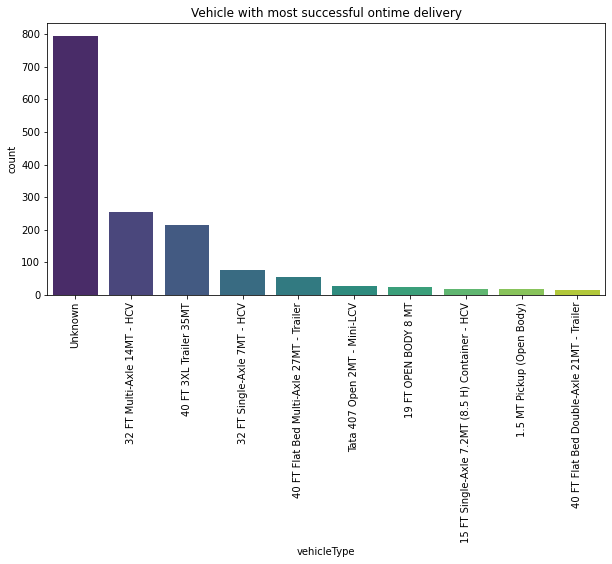

In [65]:
plt.rcParams['figure.figsize']=10,5
sns.countplot(trip[trip['ontime']==1]['vehicleType'],
             order=trip[trip['ontime']==1]['vehicleType'].value_counts().head(10).index,
             palette='viridis')
plt.xticks(rotation=90)
plt.title('Vehicle with most successful ontime delivery')
plt.show()

32 FT-Multi-Axle leads in the known vehicle type category  interms of successful ontime delivery

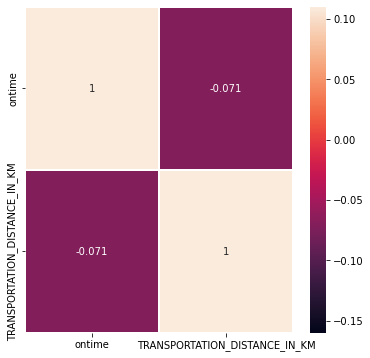

In [69]:
# finding the correlation between variables
import matplotlib.pyplot as plt
import seaborn as sns
#correlation values are stored in data frame corr_matrix
corr_matrix=trip[['ontime','TRANSPORTATION_DISTANCE_IN_KM']].corr()
#corr_matrix=trip.corr()    # Pearson standard correlation coefficient as default.    
plt.subplots(figsize=(6,6))
#using heat map for better visualisation of correlation values 
sns.heatmap(corr_matrix,vmin=-0.16,vmax=0.11,linewidths=0.2,annot=True)      
plt.show()

Correlation coefficient are not so strong.

But we can see that ontime delivery is negatively related to ontime status by a correlation factor of -0.071

Material shipped and Ontime status 

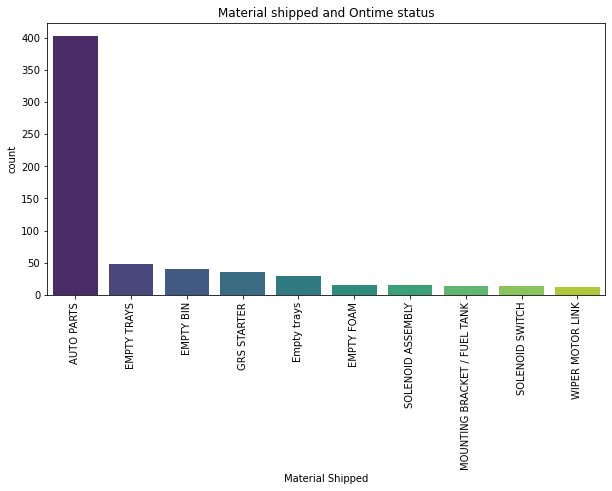

In [67]:
plt.rcParams['figure.figsize']=10,5
sns.countplot(trip[trip['ontime']==1]['Material Shipped'],
             order=trip[trip['ontime']==1] ['Material Shipped'].value_counts().head(10).index,
             palette='viridis')
plt.xticks(rotation=90)
plt.title('Material shipped and Ontime status')
plt.show()

Auto parts leads the list followed by Empty Trays

### 4) Modelling

In [89]:
# spliiting the dataset into features and target
#taking 'passed' as target(y) and all other as X
X=trip.drop(['ontime'],axis=1)
y=trip['ontime']

In [90]:
X.columns

Index(['Market/Regular ', 'vehicle_no', 'Current_Location',
       'TRANSPORTATION_DISTANCE_IN_KM', 'vehicleType', 'Driver_Name',
       'customerNameCode', 'supplierNameCode', 'Material Shipped',
       'Origin_city', 'Dest_city', 'ENTD'],
      dtype='object')

In [94]:
# splitting into test and training set
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,random_state=42,test_size=0.20)

In [95]:
# checking how many data points are there in the training set
X_train.shape

(4732, 12)

In [96]:
# checking how many data points are there in the training set
X_test.shape

(1183, 12)

4732 datapoints are given for training and 1183 data points for testing

#### 4.1) Logistic regression

In [105]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,f1_score
logit_model=LogisticRegression(random_state=42,max_iter=10000)
logit_model.fit(X_train,y_train)
y_pred=logit_model.predict(X_test)
print("Accuracy is:",round(accuracy_score(y_test,y_pred),3))
print("f1 score is:",round(f1_score(y_test,y_pred),3))
print(logit_model.get_params())

Accuracy is: 0.85
f1 score is: 0.693
{'C': 1.0, 'class_weight': None, 'dual': False, 'fit_intercept': True, 'intercept_scaling': 1, 'l1_ratio': None, 'max_iter': 10000, 'multi_class': 'auto', 'n_jobs': None, 'penalty': 'l2', 'random_state': 42, 'solver': 'lbfgs', 'tol': 0.0001, 'verbose': 0, 'warm_start': False}


#### 4.2) SVM Classifier

In [98]:
from sklearn.svm import SVC
svm_model=SVC(random_state=42)
svm_model.fit(X_train,y_train)
y_pred=svm_model.predict(X_test)
print("Accuracy is:",round(accuracy_score(y_test,y_pred),3))
print("f1 score is:",round(f1_score(y_test,y_pred),3))
print(svm_model.get_params())

Accuracy is: 0.807
f1 score is: 0.517
{'C': 1.0, 'break_ties': False, 'cache_size': 200, 'class_weight': None, 'coef0': 0.0, 'decision_function_shape': 'ovr', 'degree': 3, 'gamma': 'scale', 'kernel': 'rbf', 'max_iter': -1, 'probability': False, 'random_state': 42, 'shrinking': True, 'tol': 0.001, 'verbose': False}


#### 4.3) KNN Classifier

In [99]:
from sklearn.neighbors import KNeighborsClassifier
knn_model=KNeighborsClassifier()
knn_model.fit(X_train,y_train)
y_pred=knn_model.predict(X_test)
print("Accuracy is:",round(accuracy_score(y_test,y_pred),3))
print("f1 score is:",round(f1_score(y_test,y_pred),3))
print(knn_model.get_params())

Accuracy is: 0.793
f1 score is: 0.571
{'algorithm': 'auto', 'leaf_size': 30, 'metric': 'minkowski', 'metric_params': None, 'n_jobs': None, 'n_neighbors': 5, 'p': 2, 'weights': 'uniform'}


#### 4.4) Decision tree Classifier

In [100]:
from sklearn.tree import DecisionTreeClassifier
decision_tree=DecisionTreeClassifier(random_state=42)
decision_tree.fit(X_train,y_train)
y_pred=decision_tree.predict(X_test)
print("Accuracy is:",round(accuracy_score(y_test,y_pred),3))
print("f1 score is:",round(f1_score(y_test,y_pred),3))
print(decision_tree.get_params())

Accuracy is: 0.896
f1 score is: 0.805
{'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'gini', 'max_depth': None, 'max_features': None, 'max_leaf_nodes': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'random_state': 42, 'splitter': 'best'}


#### 4.5) Random forest Classifier

In [101]:
from sklearn.ensemble import RandomForestClassifier
random_forest=RandomForestClassifier(random_state=42)
random_forest.fit(X_train,y_train)
y_pred=random_forest.predict(X_test)
print("Accuracy is:",round(accuracy_score(y_test,y_pred),3))
print("f1 score is:",round(f1_score(y_test,y_pred),2))
print(random_forest.get_params())

Accuracy is: 0.904
f1 score is: 0.82
{'bootstrap': True, 'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'gini', 'max_depth': None, 'max_features': 'auto', 'max_leaf_nodes': None, 'max_samples': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 100, 'n_jobs': None, 'oob_score': False, 'random_state': 42, 'verbose': 0, 'warm_start': False}


| Model | Accuracy | F1_score
| --- | --- | --- |
| Logistic regression | 0.85 | 0.693 
| SVM | 0.807 | 0.517 
| KNN | 0.793 | 0.571  
| Decision tree |0.896 | 0.805 
| Random Forest | 0.904 | 0.82

From this we can see that tree based models are giving better result for our data.One thing also need to be remembered that the data set is predominantly categorical in nature.Before fine tuning Random Forest Classifier is giving the best result.

### 5)Hypertuning of  parameters

#### 5.1) Logistic regression

In [108]:
param_grid_lr = {
    'max_iter': [20, 50, 100, 200, 500, 10000],                      
    'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'],   
    'class_weight': ['balanced']                                    
}
from sklearn.model_selection import GridSearchCV
logModel_grid = GridSearchCV(estimator=LogisticRegression(random_state=42), param_grid=param_grid_lr, verbose=1, n_jobs=-1)
logModel_grid.fit(X_train, y_train)
print(logModel_grid.best_estimator_)

Fitting 5 folds for each of 30 candidates, totalling 150 fits
LogisticRegression(class_weight='balanced', max_iter=10000, random_state=42)


In [109]:
y_pred = logModel_grid.predict(X_test)

In [110]:
print("Accuracy is:",round(accuracy_score(y_test,y_pred),3))
print("f1 score is:",round(f1_score(y_test,y_pred),2))

Accuracy is: 0.801
f1 score is: 0.7


#### 5.2) SVM Classifier

In [111]:
param_grid = {'C': [1, 10, 100],
              'kernel': ['rbf']}
grid = GridSearchCV(SVC(), param_grid, refit = True, verbose = False)
grid.fit(X_train, y_train)
print(grid.best_params_)

{'C': 100, 'kernel': 'rbf'}


In [112]:
print(grid.best_estimator_)

SVC(C=100)


In [113]:
y_pred = grid.predict(X_test)

In [114]:
print("Accuracy is:",round(accuracy_score(y_test,y_pred),3))
print("f1 score is:",round(f1_score(y_test,y_pred),2))

Accuracy is: 0.845
f1 score is: 0.64


#### 5.3) KNN Classifier

In [116]:
k_range = list(range(1, 31))
weight_options = ['uniform', 'distance']
param_grid = dict(n_neighbors=k_range, weights=weight_options)
grid = GridSearchCV(KNeighborsClassifier(),param_grid,cv=10,scoring='accuracy')
grid.fit(X_train, y_train)
print(grid.best_params_)

{'n_neighbors': 17, 'weights': 'distance'}


In [117]:
y_pred = grid.predict(X_test)
print("Accuracy is:",round(accuracy_score(y_test,y_pred),3))
print("f1 score is:",round(f1_score(y_test,y_pred),2))

Accuracy is: 0.8
f1 score is: 0.57


#### 5.4) Decision Tree Classifier

In [118]:
params = {'max_leaf_nodes': list(range(2, 100)), 'min_samples_split': [2, 3, 4]}
grid_search_cv = GridSearchCV(DecisionTreeClassifier(random_state=42), params, verbose=1)
grid_search_cv.fit(X_train, y_train)
print(grid_search_cv.best_params_)

Fitting 5 folds for each of 294 candidates, totalling 1470 fits
{'max_leaf_nodes': 84, 'min_samples_split': 4}


In [119]:
y_pred = grid_search_cv.predict(X_test)
print("Accuracy is:",round(accuracy_score(y_test,y_pred),3))
print("f1 score is:",round(f1_score(y_test,y_pred),2))

Accuracy is: 0.901
f1 score is: 0.81


#### 5.5) Random Forest Classifier

In [120]:
rfc = RandomForestClassifier(n_jobs=-1,max_features= 'sqrt', oob_score = True) 
param_grid = { 
    'n_estimators': [200, 700],
    'max_features': ['auto', 'sqrt', 'log2']
}

CV_rfc = GridSearchCV(estimator=rfc, param_grid=param_grid, cv= 5)
CV_rfc.fit(X, y)
print(CV_rfc.best_params_)

{'max_features': 'sqrt', 'n_estimators': 200}


In [121]:
y_pred = CV_rfc.predict(X_test)
print("Accuracy is:",round(accuracy_score(y_test,y_pred),3))
print("f1 score is:",round(f1_score(y_test,y_pred),2))

Accuracy is: 0.998
f1 score is: 1.0


#### Performance after hyper tuning

| Model | Accuracy | F1_score
| --- | --- | --- |
| Logistic regression | 0.801 | 0.7 
| SVM | 0.845 | 0.64 
| KNN | 0.8 | 0.57 
| Decision tree |0.901 | 0.81 
| Random Forest | 0.998 | 1.0

From this, its possible to conclude that Random Forest Classfier improved to the maximum after finetuning and its the best classifier for the dataset.